# Early stage diabetes risk prediction dataset

**Source**<br>
1. M. M. Faniqul Islam (Queen Mary University of London, United Kingdom, *m.islam@smd17.qmul.ac.uk*)
2. Rahatara Ferdousi(Metropolitan University Sylhet, Bangladesh, *rahatara@metrouni.edu.bd*)
3. Sadikur Rahman (Metropolitan University Sylhet, Bangladesh, *rahmansadik004@gmail.com*)
4. Humayra Yasmin Bushra (Metropolitan University Sylhet, Bangladesh, *humayrabushra234@gmail.com*)

This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.">UCI Machine Learning Repository.</a>
<br>
<br>
**Data Set Information**<br>
This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.<br>
<br>
**Attribute Information**
- Age: 20-65
- Sex: Male, Female
- Polyuria: Yes, No.
- Polydipsia: Yes, No.
- sudden weight loss: Yes, No.
- weakness: Yes, No.
- Polyphagia: Yes, No.
- Genital thrush: Yes, No.
- visual blurring: Yes, No.
- Itching: Yes, No.
- Irritability: Yes, No.
- delayed healing: Yes, No.
- partial paresis: Yes, No.
- muscle stiffness: Yes, No.
- Alopecia: Yes, No.
- Obesity: Yes, No.
- Class: Positive, Negative.
<br>
<br>
**Citation Request**<br>
<a href="https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12">Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.</a>


In [84]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [128]:
def feature_info(feature_name=None):
    features = {'Polyuria': 'Excessive or an abnormally large production or passage of urine (greater than 2.5 L[1] or 3 L[6] over 24 hours in adults)',
                'Polydipsia': 'Excessive thirst or excess drinking',
                'sudden weight loss': '-',
                'weakness': '-',
                'visual blurring': 'Ocular symptom where vision becomes less precise and there is added difficulty to resolve fine details',
                'delayed healing': '-',
                'partial paresis': 'Condition typified by a weakness of voluntary movement, or by partial loss of voluntary movement or by impaired movement',
                'muscle stiffness': 'When your muscles feel tight and you find it more difficult to move than you usually do, especially after rest',
                'Polyphagia': 'Abnormally strong sensation of hunger or desire to eat often leading to or accompanied by overeating',
                'Genital thrush': '(or candidiasis) Common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful',
                'Itching': 'Irritating sensation that makes you want to scratch your skin',
                'Irritability': 'Feeling of agitation',
                'Alopecia': 'Condition in which hair is lost from some or all areas of the body',
                'Obesity': 'Complex disease involving an excessive amount of body fat'}
    try:
        return features[feature_name]
    except:
        return print('There is no such a symptom in the list.')

In [119]:
def plot_countplots(feature, hue=None, palette='hls', percentage=False):
    if feature != 'Gender':
        ax = sns.countplot(x=feature, data=df, hue=hue, palette=palette, alpha=0.8, order=['Yes', 'No'])
    else:
        ax = sns.countplot(x=feature, data=df, hue=hue, palette=palette, alpha=0.8)
    plt.legend(framealpha=0.4)
    if hue == None:
        ax.legend_.remove()
    if percentage:
        for p in ax.patches:
            ax.annotate(format(p.get_height()/df[feature].shape[0] * 100, '.1f'),
                        ((p.get_width()/2 + p.get_x()), p.get_height()),
                        va='center', ha='center', xytext=(0, 5),
                        textcoords='offset points')

In [3]:
df = pd.read_csv('./diabetes_data_upload.csv')

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


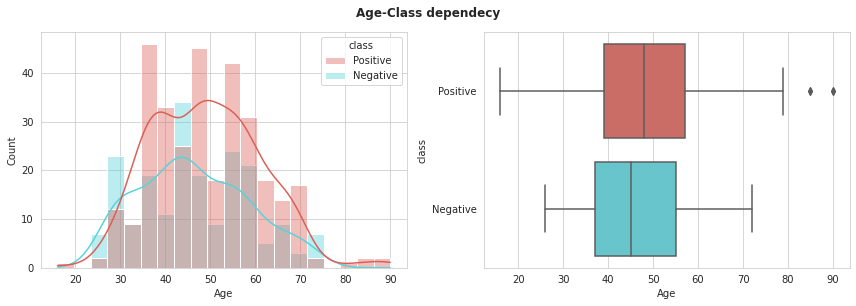

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(x='Age', data=df, hue='class', palette='hls', alpha=0.4, ax=axs[0], bins=20, kde=True)
sns.boxplot(x='Age', y='class', data=df, palette='hls', ax=axs[1])
plt.tight_layout()
fig.suptitle('Age-Class dependecy', fontweight='bold', y=1.05);

In [9]:
df.groupby('class')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Negative,200.0,46.360000,12.080983,26.0,37.0,45.0,55.0,72.0
Positive,320.0,49.071875,12.097481,16.0,39.0,48.0,57.0,90.0


In [10]:
categ_features = df.drop(['Age', 'class'], axis=1).columns

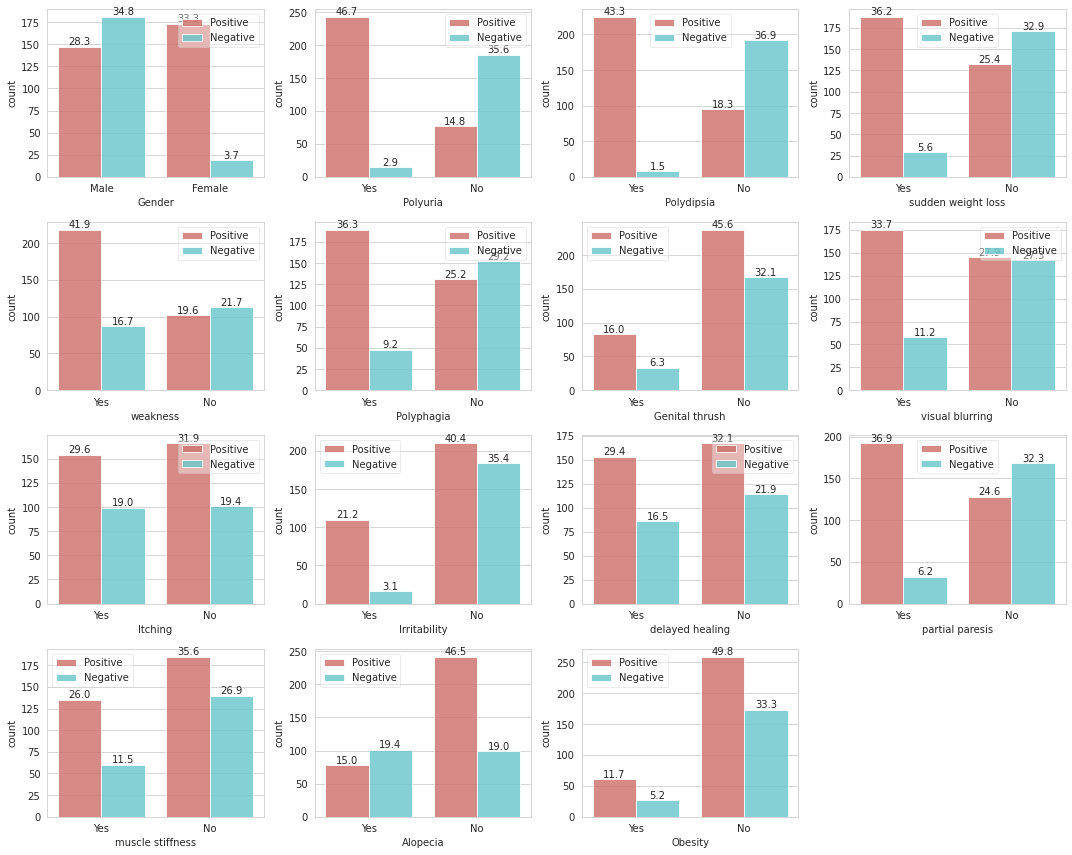

In [120]:
fig = plt.figure(figsize=(15, 12))
for num, feature in enumerate(categ_features):
    plt.subplot(4, 4, num+1)
    plot_countplots(feature, hue='class', percentage=True)
    if num == 15:
        break
plt.tight_layout()

According to the figures above, person with diabet would have such symptoms and additional diseas: polyuria, polydipsia, polyphagia, sudden weight loss, weakness, vision blurring, muscle stiffnes etc.

In [152]:
df_copy = df.copy()

In [187]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
for feature in df_copy.select_dtypes(include='object').columns:
    if feature == 'Gender':
        df_copy[feature] = df_copy[feature].map({'Male': 0, 'Female': 1})
    elif feature == 'class':
        df_copy[feature] = df_copy[feature].map({'Negative': 0, 'Positive': 1})
    else:
        df_copy[feature] = df_copy[feature].map({'No': 0, 'Yes': 1})

In [181]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop('class', axis=1), df_copy['class'],
                                                    test_size=0.2, shuffle=True, stratify=df_copy['class'],
                                                    random_state=42)

In [183]:
scaler = StandardScaler().fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

In [191]:
def print_stat(y_test, pred):
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [194]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
pred_logit = logit.predict(X_test)
print_stat(y_test, pred_logit)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104

[[39  1]
 [ 5 59]]


In [195]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print_stat(y_test, pred_svc)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

[[39  1]
 [ 0 64]]


In [210]:
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print_stat(y_test, pred_tree)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

[[40  0]
 [ 2 62]]


In [199]:
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train, y_train)
pred_forest = forest.predict(X_test)
print_stat(y_test, pred_forest)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

[[39  1]
 [ 0 64]]
